#### 6610402230 Sirisuk Tharntham

# Assignment 4: Text Classification with ML
### FastFood_Opinion

### - using Logistic Regression

In [83]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

prepare data X,y

In [84]:
df = pd.read_csv("FastFood_Opinion.csv")
print(df.head())
X = df["message"]
y = df["class"]

   class                                            message
0      0  11.30 น. ไปที่สาขาในปั๊มคาลเท็กซ์ ประชานุกูล ซ...
1      0  BK ทุกสาขาบริการดี โดยเฉพาะอย่างยิ่งเอมโพเรียม...
2      0  Burger King สาขา The Bright พระราม 2 บริการห่ว...
3      0  Burger King สาขาปั้ม ป.ต.ท.บ้านพร อ.ถลาง เมื่อ...
4      0  chicken strip ชิ้นเล็กมาก เทียบกับป้ายโฆษณาบนโต๊ะ


tokenized sentences

In [85]:
X_tokenized = X.apply(word_tokenize, keep_whitespace=False)
X_tokenized.head()

0    [11.30, น., ไป, ที่, สาขา, ใน, ปั๊ม, คาลเท็กซ์...
1    [BK, ทุก, สาขา, บริการ, ดี, โดยเฉพาะอย่างยิ่ง,...
2    [Burger, King, สาขา, The, Bright, พระราม, 2, บ...
3    [Burger, King, สาขา, ปั้ม, ป., ต., ท, ., บ้าน,...
4    [chicken, strip, ชิ้น, เล็ก, มาก, เทียบ, กับ, ...
Name: message, dtype: object

Bag of Words Term Frequency

In [86]:
bow_vectorizer = CountVectorizer(analyzer=lambda x: x,ngram_range=(1,1),binary=False)
X_bow = bow_vectorizer.fit_transform(X_tokenized) # to bag of word terms frequency
vocab_bow = np.array(bow_vectorizer.get_feature_names_out())
print(X_bow.shape) # (documents, vocab)
print(vocab_bow.shape)
print(vocab_bow[250:270])
print(X_bow)
print(X_tokenized.head(2))
print(vocab_bow[78])
print(vocab_bow[1341])

(642, 3542)
(3542,)
['M' 'MBK' 'Mall' 'Management' 'Market' 'McDonalds' 'Mega' 'Moouse'
 'Mortor' 'Motorway' 'Mushroom' 'Nugget' 'Operation' 'Order' 'POS'
 'Paradise' 'Park' 'Piroj' 'Pizza' 'Place']
  (0, 78)	1
  (0, 1398)	1
  (0, 3477)	1
  (0, 1341)	1
  (0, 2352)	1
  (0, 3418)	1
  (0, 1644)	1
  (0, 776)	1
  (0, 1596)	1
  (0, 935)	1
  (0, 574)	1
  (0, 2129)	1
  (0, 1006)	1
  (0, 1769)	4
  (0, 3447)	2
  (0, 3285)	1
  (0, 2935)	1
  (0, 2579)	1
  (0, 2149)	1
  (0, 123)	1
  (0, 948)	2
  (0, 489)	1
  (0, 1237)	1
  (0, 1584)	1
  (0, 857)	1
  :	:
  (637, 3367)	1
  (637, 2671)	1
  (638, 3027)	1
  (638, 1877)	1
  (638, 818)	1
  (638, 2585)	1
  (638, 2070)	1
  (638, 3390)	1
  (638, 1996)	1
  (639, 2620)	1
  (639, 1877)	1
  (639, 2585)	1
  (639, 762)	1
  (640, 3285)	1
  (640, 1524)	1
  (640, 804)	1
  (640, 528)	1
  (640, 2026)	1
  (640, 1036)	1
  (640, 161)	1
  (641, 2620)	1
  (641, 1877)	1
  (641, 3522)	1
  (641, 818)	1
  (641, 2585)	1
0    [11.30, น., ไป, ที่, สาขา, ใน, ปั๊ม, คาลเท็กซ์...
1    

Binary Term Frequency

In [87]:
binary_vectorizer = CountVectorizer(analyzer=lambda x: x,ngram_range=(1,1),binary=True)
X_binary = binary_vectorizer.fit_transform(X_tokenized) # to binary terms frequency
vocab_binary = np.array(binary_vectorizer.get_feature_names_out())
print(X_binary.shape) # (documents, vocab)
print(vocab_binary.shape)
print(vocab_binary[250:270])
print(X_binary)
print(X_tokenized.head(2))
print(vocab_binary[3418])
print(vocab_binary[1644])

(642, 3542)
(3542,)
['M' 'MBK' 'Mall' 'Management' 'Market' 'McDonalds' 'Mega' 'Moouse'
 'Mortor' 'Motorway' 'Mushroom' 'Nugget' 'Operation' 'Order' 'POS'
 'Paradise' 'Park' 'Piroj' 'Pizza' 'Place']
  (0, 78)	1
  (0, 1398)	1
  (0, 3477)	1
  (0, 1341)	1
  (0, 2352)	1
  (0, 3418)	1
  (0, 1644)	1
  (0, 776)	1
  (0, 1596)	1
  (0, 935)	1
  (0, 574)	1
  (0, 2129)	1
  (0, 1006)	1
  (0, 1769)	1
  (0, 3447)	1
  (0, 3285)	1
  (0, 2935)	1
  (0, 2579)	1
  (0, 2149)	1
  (0, 123)	1
  (0, 948)	1
  (0, 489)	1
  (0, 1237)	1
  (0, 1584)	1
  (0, 857)	1
  :	:
  (637, 3367)	1
  (637, 2671)	1
  (638, 3027)	1
  (638, 1877)	1
  (638, 818)	1
  (638, 2585)	1
  (638, 2070)	1
  (638, 3390)	1
  (638, 1996)	1
  (639, 2620)	1
  (639, 1877)	1
  (639, 2585)	1
  (639, 762)	1
  (640, 3285)	1
  (640, 1524)	1
  (640, 804)	1
  (640, 528)	1
  (640, 2026)	1
  (640, 1036)	1
  (640, 161)	1
  (641, 2620)	1
  (641, 1877)	1
  (641, 3522)	1
  (641, 818)	1
  (641, 2585)	1
0    [11.30, น., ไป, ที่, สาขา, ใน, ปั๊ม, คาลเท็กซ์...
1    

Bigram Term Frequency

In [88]:
bigram_vectorizer = CountVectorizer(analyzer="word",ngram_range=(2,2),binary=False)
X_bigram = bigram_vectorizer.fit_transform(X) # to bag of words
vocab_bigram= np.array(bigram_vectorizer.get_feature_names_out())
print(X_bigram.shape) # (documents, vocab)
print(vocab_bigram.shape)
print(vocab_bigram[250:270])
print(X_bigram)
print(X_tokenized.head(2))
print(vocab_bigram[17033])
print(vocab_bigram[10601])

(642, 17425)
(17425,)
['bk ในป' 'bkk to' 'blocked โทรศ' 'brand loyalty' 'bright พระราม'
 'brule ออะไรคร' 'burger king' 'burger ของค' 'burger อร' 'burger ออ'
 'burger เท' 'burger แต' 'burger ไม' 'burger1ช พนง' 'call center'
 'caltex prachanukun' 'cancelไปเลย เราไม' 'carry out' 'cashier หร'
 'center ดไม']
  (0, 36)	1
  (0, 149)	1
  (0, 17033)	1
  (0, 10601)	1
  (0, 8230)	1
  (0, 1178)	1
  (0, 7650)	1
  (0, 11656)	1
  (0, 16292)	1
  (0, 10902)	1
  (0, 11782)	1
  (0, 12898)	1
  (0, 1388)	1
  (0, 6900)	1
  (0, 2898)	1
  (0, 13248)	1
  (0, 3866)	1
  (0, 14989)	1
  (0, 4630)	1
  (0, 5990)	1
  (0, 3150)	1
  (0, 6552)	1
  (1, 246)	1
  (1, 1510)	1
  (1, 1693)	1
  :	:
  (634, 11589)	1
  (634, 2644)	1
  (635, 1523)	1
  (635, 12670)	1
  (635, 5995)	1
  (635, 4921)	1
  (635, 10052)	1
  (635, 11267)	1
  (635, 8331)	1
  (636, 17278)	1
  (636, 12315)	1
  (636, 5334)	1
  (636, 15359)	1
  (636, 1970)	1
  (636, 4059)	1
  (636, 14906)	1
  (636, 8788)	1
  (637, 9670)	1
  (637, 4284)	1
  (638, 12128)	1
  (63

In [89]:
# Step 3: Split the dataset
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow, y, test_size=0.2, random_state=777)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y, test_size=0.2, random_state=777)
X_bigram_train, X_bigram_test, y_bigram_train, y_bigram_test = train_test_split(X_bigram, y, test_size=0.2, random_state=777)


In [90]:
# Step 4: Train the binomial logistic regression
model_bow = LogisticRegression()
model_binary = LogisticRegression()
model_bigram = LogisticRegression()

In [91]:
model_bow.fit(X_bow_train,y_bow_train)
model_binary.fit(X_binary_train,y_binary_train)
model_bigram.fit(X_bigram_train,y_bigram_train)

LogisticRegression()

In [92]:
# Step 5: Evaluate the model
y_bow_pred = model_bow.predict(X_bow_test)
y_binary_pred = model_binary.predict(X_binary_test)
y_bigram_pred = model_bigram.predict(X_bigram_test)

accuracy_bow = accuracy_score(y_bow_test, y_bow_pred)
accuracy_binary = accuracy_score(y_binary_test, y_binary_pred)
accuracy_bigram = accuracy_score(y_bigram_test, y_bigram_pred)
print("Accuracy bow:", accuracy_bow)
print("Accuracy binary:", accuracy_binary)
print("Accuracy bigram:", accuracy_bigram)

Accuracy bow: 0.9147286821705426
Accuracy binary: 0.9302325581395349
Accuracy bigram: 0.7674418604651163


Bag of word report

Classification Report (bow):
              precision    recall  f1-score   support

           -       0.95      0.88      0.91        64
           +       0.89      0.95      0.92        65

    accuracy                           0.91       129
   macro avg       0.92      0.91      0.91       129
weighted avg       0.92      0.91      0.91       129

Confusion Matrix (bow):
[[56  8]
 [ 3 62]]
[[56  8]
 [ 3 62]]


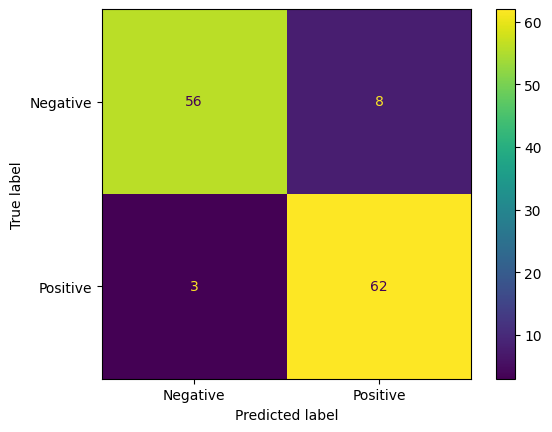

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print("Classification Report (bow):")
print(classification_report(y_bow_test, y_bow_pred,target_names=["-","+"]))
print("Confusion Matrix (bow):")
cm = confusion_matrix(y_bow_test, y_bow_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
print(cm)
cm_display.plot()
plt.show()

Binary report

Classification Report (bow):
              precision    recall  f1-score   support

           -       0.95      0.91      0.93        64
           +       0.91      0.95      0.93        65

    accuracy                           0.93       129
   macro avg       0.93      0.93      0.93       129
weighted avg       0.93      0.93      0.93       129

Confusion Matrix (bow):
[[58  6]
 [ 3 62]]
[[58  6]
 [ 3 62]]


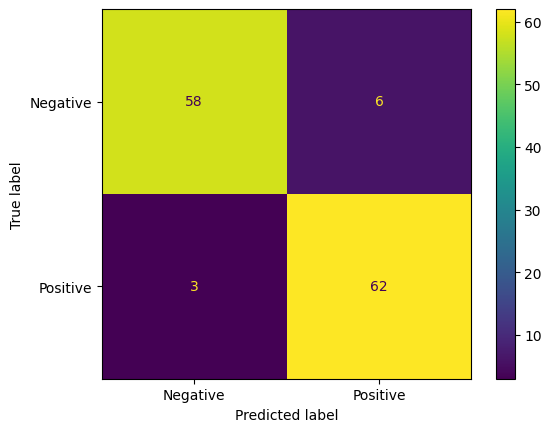

In [94]:
print("Classification Report (bow):")
print(classification_report(y_binary_test, y_binary_pred,target_names=["-","+"]))
print("Confusion Matrix (bow):")
cm = confusion_matrix(y_binary_test, y_binary_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
print(cm)
cm_display.plot()
plt.show()


Bigram report

Classification Report (bow):
              precision    recall  f1-score   support

           -       0.97      0.55      0.70        64
           +       0.69      0.98      0.81        65

    accuracy                           0.77       129
   macro avg       0.83      0.77      0.76       129
weighted avg       0.83      0.77      0.76       129

Confusion Matrix (bow):
[[35 29]
 [ 1 64]]
[[35 29]
 [ 1 64]]


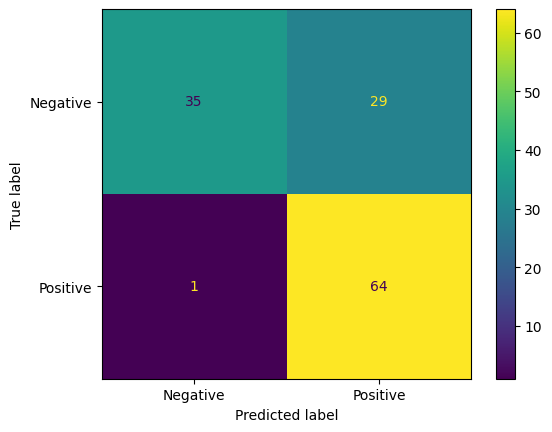

In [95]:
print("Classification Report (bow):")
print(classification_report(y_bigram_test, y_bigram_pred,target_names=["-","+"]))
print("Confusion Matrix (bow):")
cm = confusion_matrix(y_bigram_test, y_bigram_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
print(cm)
cm_display.plot()
plt.show()


TEST

In [96]:
def predict_test(text_bow,model : LogisticRegression):
    predicted_class = model_bow.predict(text_bow)
    print("Predicted Class: ", predicted_class[0])

    print(new_text_tokenized)
    print(new_text_bow)
    # print(new_text_bow.toarray())
    

In [97]:
# Predict New Data: Example 1

# new_text = "ของไม่ตรงปก ส่งช้า แพ็คไม่ดี"
new_text = ["สินค้าหมด ทำไมไม่แจ้ง ขึ้นว่าหมดอ่ะ"]
new_text = pd.Series(new_text)
new_text_tokenized = new_text.apply(word_tokenize, keep_whitespace=False)
new_text_bow = bow_vectorizer.transform(new_text_tokenized)

predict_test(new_text_bow,model_bow)
predict_test(new_text_bow,model_binary)
predict_test(new_text_bow,model_bigram)

Predicted Class:  0
0    [สินค้า, หมด, ทำไม, ไม่, แจ้ง, ขึ้น, ว่า, หมด,...
dtype: object
  (0, 649)	1
  (0, 1327)	1
  (0, 2242)	1
  (0, 2371)	1
  (0, 2462)	2
  (0, 2659)	1
  (0, 3183)	1
  (0, 3487)	1
Predicted Class:  0
0    [สินค้า, หมด, ทำไม, ไม่, แจ้ง, ขึ้น, ว่า, หมด,...
dtype: object
  (0, 649)	1
  (0, 1327)	1
  (0, 2242)	1
  (0, 2371)	1
  (0, 2462)	2
  (0, 2659)	1
  (0, 3183)	1
  (0, 3487)	1
Predicted Class:  0
0    [สินค้า, หมด, ทำไม, ไม่, แจ้ง, ขึ้น, ว่า, หมด,...
dtype: object
  (0, 649)	1
  (0, 1327)	1
  (0, 2242)	1
  (0, 2371)	1
  (0, 2462)	2
  (0, 2659)	1
  (0, 3183)	1
  (0, 3487)	1


In [98]:
# Predict New Data: Example 2

new_text = ["ส่งรวดเร็ว แม่ค้าให้ข้อมูลครบดี"]
# new_text = ["สินค้าดีมีคุณภาพ ชอบค่ะ แนะนำเลย"]
new_text = pd.Series(new_text)
new_text_tokenized = new_text.apply(word_tokenize, keep_whitespace=False)
new_text_bow = bow_vectorizer.transform(new_text_tokenized)

predict_test(new_text_bow,model_bow)
predict_test(new_text_bow,model_binary)
predict_test(new_text_bow,model_bigram)


Predicted Class:  1
0    [ส่ง, รวดเร็ว, แม่ค้า, ให้, ข้อมูล, ครบ, ดี]
dtype: object
  (0, 657)	1
  (0, 695)	1
  (0, 1045)	1
  (0, 2007)	1
  (0, 2417)	1
  (0, 3435)	1
Predicted Class:  1
0    [ส่ง, รวดเร็ว, แม่ค้า, ให้, ข้อมูล, ครบ, ดี]
dtype: object
  (0, 657)	1
  (0, 695)	1
  (0, 1045)	1
  (0, 2007)	1
  (0, 2417)	1
  (0, 3435)	1
Predicted Class:  1
0    [ส่ง, รวดเร็ว, แม่ค้า, ให้, ข้อมูล, ครบ, ดี]
dtype: object
  (0, 657)	1
  (0, 695)	1
  (0, 1045)	1
  (0, 2007)	1
  (0, 2417)	1
  (0, 3435)	1


### - using Naive Bays

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from pythainlp.tokenize import word_tokenize
# Step 1: Load and preprocess the data
# Tokenize Thai text
# Step 2: Create bag-of-words representation
# Step 3: Split the dataset

# use from previous logistic regression data preparing

In [100]:
# Step 4: Train the binomial logistic regression
model_bow = MultinomialNB()
model_binary = MultinomialNB()
model_bigram = MultinomialNB()

In [101]:
model_bow.fit(X_bow_train,y_bow_train)
model_binary.fit(X_binary_train,y_binary_train)
model_bigram.fit(X_bigram_train,y_bigram_train)

MultinomialNB()

In [102]:
# Step 5: Evaluate the model
y_bow_pred = model_bow.predict(X_bow_test)
y_binary_pred = model_binary.predict(X_binary_test)
y_bigram_pred = model_bigram.predict(X_bigram_test)

accuracy_bow = accuracy_score(y_bow_test, y_bow_pred)
accuracy_binary = accuracy_score(y_binary_test, y_binary_pred)
accuracy_bigram = accuracy_score(y_bigram_test, y_bigram_pred)
print("Accuracy bow:", accuracy_bow)
print("Accuracy binary:", accuracy_binary)
print("Accuracy bigram:", accuracy_bigram)

Accuracy bow: 0.8604651162790697
Accuracy binary: 0.8682170542635659
Accuracy bigram: 0.5116279069767442


Bag of Word report

Classification Report (bow):
              precision    recall  f1-score   support

           -       0.86      0.86      0.86        64
           +       0.86      0.86      0.86        65

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129

Confusion Matrix (bow):
[[55  9]
 [ 9 56]]
[[55  9]
 [ 9 56]]


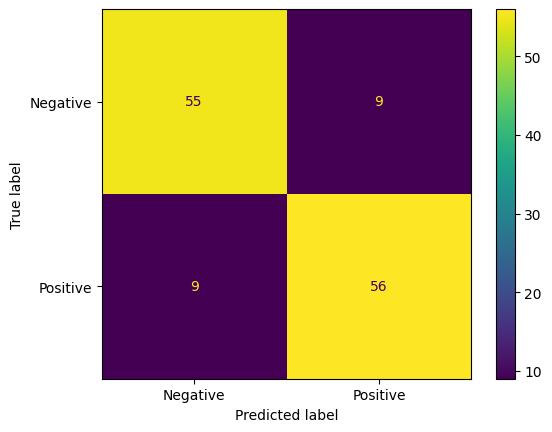

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print("Classification Report (bow):")
print(classification_report(y_bow_test, y_bow_pred,target_names=["-","+"]))
print("Confusion Matrix (bow):")
cm = confusion_matrix(y_bow_test, y_bow_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
print(cm)
cm_display.plot()
plt.show()

Binary report

Classification Report (bow):
              precision    recall  f1-score   support

           -       0.85      0.89      0.87        64
           +       0.89      0.85      0.87        65

    accuracy                           0.87       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.87      0.87      0.87       129

Confusion Matrix (bow):
[[57  7]
 [10 55]]
[[57  7]
 [10 55]]


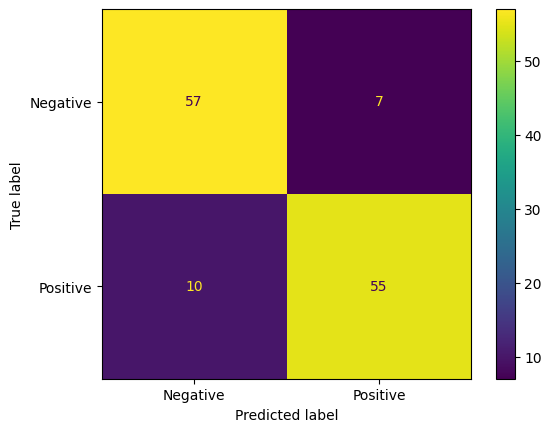

In [104]:
print("Classification Report (bow):")
print(classification_report(y_binary_test, y_binary_pred,target_names=["-","+"]))
print("Confusion Matrix (bow):")
cm = confusion_matrix(y_binary_test, y_binary_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
print(cm)
cm_display.plot()
plt.show()


Bigram report

Classification Report (bow):
              precision    recall  f1-score   support

           -       0.57      0.06      0.11        64
           +       0.51      0.95      0.66        65

    accuracy                           0.51       129
   macro avg       0.54      0.51      0.39       129
weighted avg       0.54      0.51      0.39       129

Confusion Matrix (bow):
[[ 4 60]
 [ 3 62]]
[[ 4 60]
 [ 3 62]]


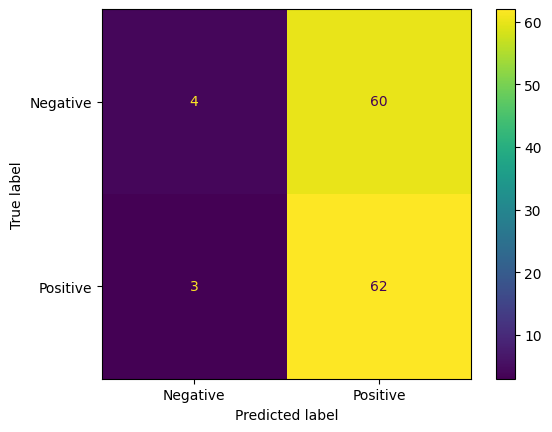

In [105]:
print("Classification Report (bow):")
print(classification_report(y_bigram_test, y_bigram_pred,target_names=["-","+"]))
print("Confusion Matrix (bow):")
cm = confusion_matrix(y_bigram_test, y_bigram_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
print(cm)
cm_display.plot()
plt.show()


TEST

In [106]:
def predict_test(text_bow,model : MultinomialNB):
    predicted_class = model_bow.predict(text_bow)
    print("Predicted Class: ", predicted_class)

    print(new_text_tokenized)
    print(new_text_bow)
    # print(new_text_bow.toarray())
    

In [107]:
new_text = ["ของไม่ตรงปก ส่งช้า แพ็คไม่", "สินค้าหมด ทำไมไม่แจ้ง ขึ้นว่าหมดอ่ะ","ส่งรวดเร็ว แม่ค้าให้ข้อมูลครบดี", "สินค้าดีราคาไม่แพง ชอบค่ะ แนะนำเลย"]
new_text = pd.Series(new_text)
new_text_tokenized = new_text.apply(word_tokenize, keep_whitespace=False)
new_text_bow = bow_vectorizer.transform(new_text_tokenized)

predict_test(new_text_bow,model_bow)
predict_test(new_text_bow,model_binary)
predict_test(new_text_bow,model_bigram)

Predicted Class:  [0 0 1 1]
0             [ของ, ไม่, ตรง, ปก, ส่ง, ช้า, แพ็ค, ไม่]
1    [สินค้า, หมด, ทำไม, ไม่, แจ้ง, ขึ้น, ว่า, หมด,...
2         [ส่ง, รวดเร็ว, แม่ค้า, ให้, ข้อมูล, ครบ, ดี]
3    [สินค้า, ดี, ราคา, ไม่, แพง, ชอบ, ค่ะ, แนะนำ, ...
dtype: object
  (0, 611)	1
  (0, 976)	1
  (0, 1096)	1
  (0, 2417)	1
  (0, 3251)	1
  (0, 3487)	2
  (1, 649)	1
  (1, 1327)	1
  (1, 2242)	1
  (1, 2371)	1
  (1, 2462)	2
  (1, 2659)	1
  (1, 3183)	1
  (1, 3487)	1
  (2, 657)	1
  (2, 695)	1
  (2, 1045)	1
  (2, 2007)	1
  (2, 2417)	1
  (2, 3435)	1
  (3, 818)	1
  (3, 918)	1
  (3, 1045)	1
  (3, 2070)	1
  (3, 2371)	1
  (3, 3027)	1
  (3, 3223)	1
  (3, 3249)	1
  (3, 3487)	1
Predicted Class:  [0 0 1 1]
0             [ของ, ไม่, ตรง, ปก, ส่ง, ช้า, แพ็ค, ไม่]
1    [สินค้า, หมด, ทำไม, ไม่, แจ้ง, ขึ้น, ว่า, หมด,...
2         [ส่ง, รวดเร็ว, แม่ค้า, ให้, ข้อมูล, ครบ, ดี]
3    [สินค้า, ดี, ราคา, ไม่, แพง, ชอบ, ค่ะ, แนะนำ, ...
dtype: object
  (0, 611)	1
  (0, 976)	1
  (0, 1096)	1
  (0, 2417)	1
  (0, 3251)	1
  (0, 348

จากการทดลองสร้างโมเดล เพื่อทำนาย sentiment analysis จาก dataset Fastfood_Opinion.csv โดยใช้รูปแบบ
feature เป็น Bag of Word, Binary และ Bigram Terms Frequency ด้วย 2 algorithm logistic regression และ naiivebays พบว่าทั้งสองโมเดลมีประสิทธิภาพในการทำนายเมื่อใช้ feature แบบ Bag of Word และ Binary ไกล้เคียงกัน แต่ Bigram ประสิทธิภาพน้อยกว่ามาก ประมาณ 20 % ใน logistic regression และ almost 1/2 ของ naiivebays algorithm จากการวิเคราห์โมเดลจาก naiivebays ใช้ probability เป็นหลักตัว feature แบบ bigram รวม adjagency word ทำให้บางครั้งหาคำใน document อื่นไม่เจอ ต่างจาก อีก 2 รูปแบบ naiivebays มีประสิทธิภาพมากกว่า ส่วนของ logistic regression เมื่อรวมคำแล้วมันกลายเป็นคำที่รวมกันและมีคามเป็นไปได้เพิ่มมากขึ้นแต่ datasource น้อยเกินไป แต่การใช้ logistic regression ได้ประสิทธิภาพสูงสุดเพราะ เป็นการทำ gradient decent เพื่อปรับค่า weight ให้เข้าไกล้ global minimum เพื่อให้ได้ yhat ตรงที่สุดดังนั้นเห็นได้จาก bigram ที่มีประสิทธิภาพมากที่สุด ถ้ามีข้อมูลมากกว่านี้ การทำนาย bigram ใน logistic regresion น่าจะมีประสิทธิภาพมากขึ้น แต่สรุปคือ overall แล้ว algorithm logistic regression มีประสิทธิภาพมากกว่า naiivebays อย่างเห็นได้ชัด

6610402230 ศิริสุข ทานธรรม